# Generative Models

In [116]:
# load necessary packages

import numpy as np
from numpy.random import multivariate_normal
from random import random
import matplotlib.pyplot as plt

## 1. Data Generation

In [95]:
# Parameters
mu_p, mu_n = [2,0], [-2,0] # mu_{+}, mu_{-}
sigma_p = [[1.0,0.8],[0.8,2.0]] # Sigma_{+}
sigma_n = [[2.0,0.6],[0.6,1.0]] # Sigma_{-}
p_y_p = 0.6 # p(y=+1)
N = 1000


def data_generation_process():
    X, Y, C = np.zeros((N,2)), [], []
    # 
    for idx in range(N):
        r = random()
        if r < p_y_p:
            Y.append(1)
            C.append("red")
            sample = multivariate_normal(mu_p, sigma_p, 1)
        else:
            Y.append(-1)
            C.append("blue")
            sample = multivariate_normal(mu_n, sigma_n, 1)
        X[idx,:] = sample
    return X.T, Y, C

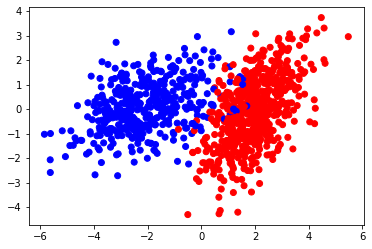

In [96]:
# Visualize the data

X, Y, C = data_generation_process()
plt.scatter(X[0,:], X[1,:], c=C)
plt.show()

## 2. Parameter Estimation

In [117]:
# q(y;\alpha)
alpha = sum(np.array(Y) == 1)/N
print(alpha)

0.588


In [118]:
# parameter estimation function for q(x|y)

def MLE(X, Y, label):
    idx = (np.array(Y) == label)
    X_label = X[:,idx]
    N_label = X_label.shape[1] # Number of samples
    mean = X_label.mean(axis=1)
    X_label_nomean = X_label - mean.reshape((2,1))
    Sigma = np.dot(X_label_nomean, X_label_nomean.T)/N_label
    return mean, Sigma

In [119]:
# MLE on the given data

hat_mu_p, hat_sigma_p = MLE(X, Y, label=1)
print("The mean of q(x|y=+1): \n {}".format(hat_mu_p))
print("The covariance of q(x|y=+1): \n {}".format(hat_sigma_p))
print("\n")

hat_mu_n, hat_sigma_n = MLE(X, Y, label=-1)
print("The mean of q(x|y=-1): \n {}".format(hat_mu_n))
print("The covariance of q(x|y=-1): \n {}".format(hat_sigma_n))

The mean of q(x|y=+1): 
 [ 1.95234081 -0.10508364]
The covariance of q(x|y=+1): 
 [[0.87992029 0.74474428]
 [0.74474428 1.97406197]]


The mean of q(x|y=-1): 
 [-2.07947233  0.08018599]
The covariance of q(x|y=-1): 
 [[1.88231783 0.55364935]
 [0.55364935 1.0720779 ]]


## 3. Naive Bayes Classifier

In [114]:
# MLE function with Naive Bayes

def MLE_NBayes(X, Y, label):
    idx = (np.array(Y) == label)
    X_label = X[:, idx]
    N_label = X_label.shape[1] # Number of samples
    # The estimated mean is the same as in MLE()
    mean = X_label.mean(axis=1)
    # We can estimate sigma per dimension
    X_label_nomean = X_label - mean.reshape((2,1))
    Sigma = (X_label_nomean**2).sum(axis=1)/N_label # Per dimension
    return mean, np.diag(Sigma)

In [115]:
# MLE on the given data

print("Parameter estimation on Naive Bayes Classifier")
hat_mu_p, hat_sigma_p = MLE_NBayes(X, Y, label=1)
print("The mean of q(x|y=+1): \n {}".format(hat_mu_p))
print("The covariance of q(x|y=+1): \n {}".format(hat_sigma_p))
print("\n")

hat_mu_n, hat_sigma_n = MLE_NBayes(X, Y, label=-1)
print("The mean of q(x|y=-1): \n {}".format(hat_mu_n))
print("The covariance of q(x|y=-1): \n {}".format(hat_sigma_n))

Parameter estimation on Naive Bayes Classifier
The mean of q(x|y=+1): 
 [ 1.95234081 -0.10508364]
The covariance of q(x|y=+1): 
 [[0.87992029 0.        ]
 [0.         1.97406197]]


The mean of q(x|y=-1): 
 [-2.07947233  0.08018599]
The covariance of q(x|y=-1): 
 [[1.88231783 0.        ]
 [0.         1.0720779 ]]
